In [1]:
import pandas as pd

df = pd.read_csv('data/합계출산율_지역별.csv')
df.head(), df.shape, df['지역별'].unique()

(  지역별    시점    출생아수  합계출산율
 0  서울  2000  133154  1.275
 1  서울  2001  114764  1.111
 2  서울  2002  102008  1.006
 3  서울  2003  101227  1.014
 4  서울  2004   99828  1.015,
 (408, 4),
 array(['서울', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시', '울산광역시',
        '세종특별자치시', '경기도', '강원특별자치도', '충청북도', '충청남도', '전라북도', '전라남도',
        '경상북도', '경상남도', '제주특별자치도'], dtype=object))

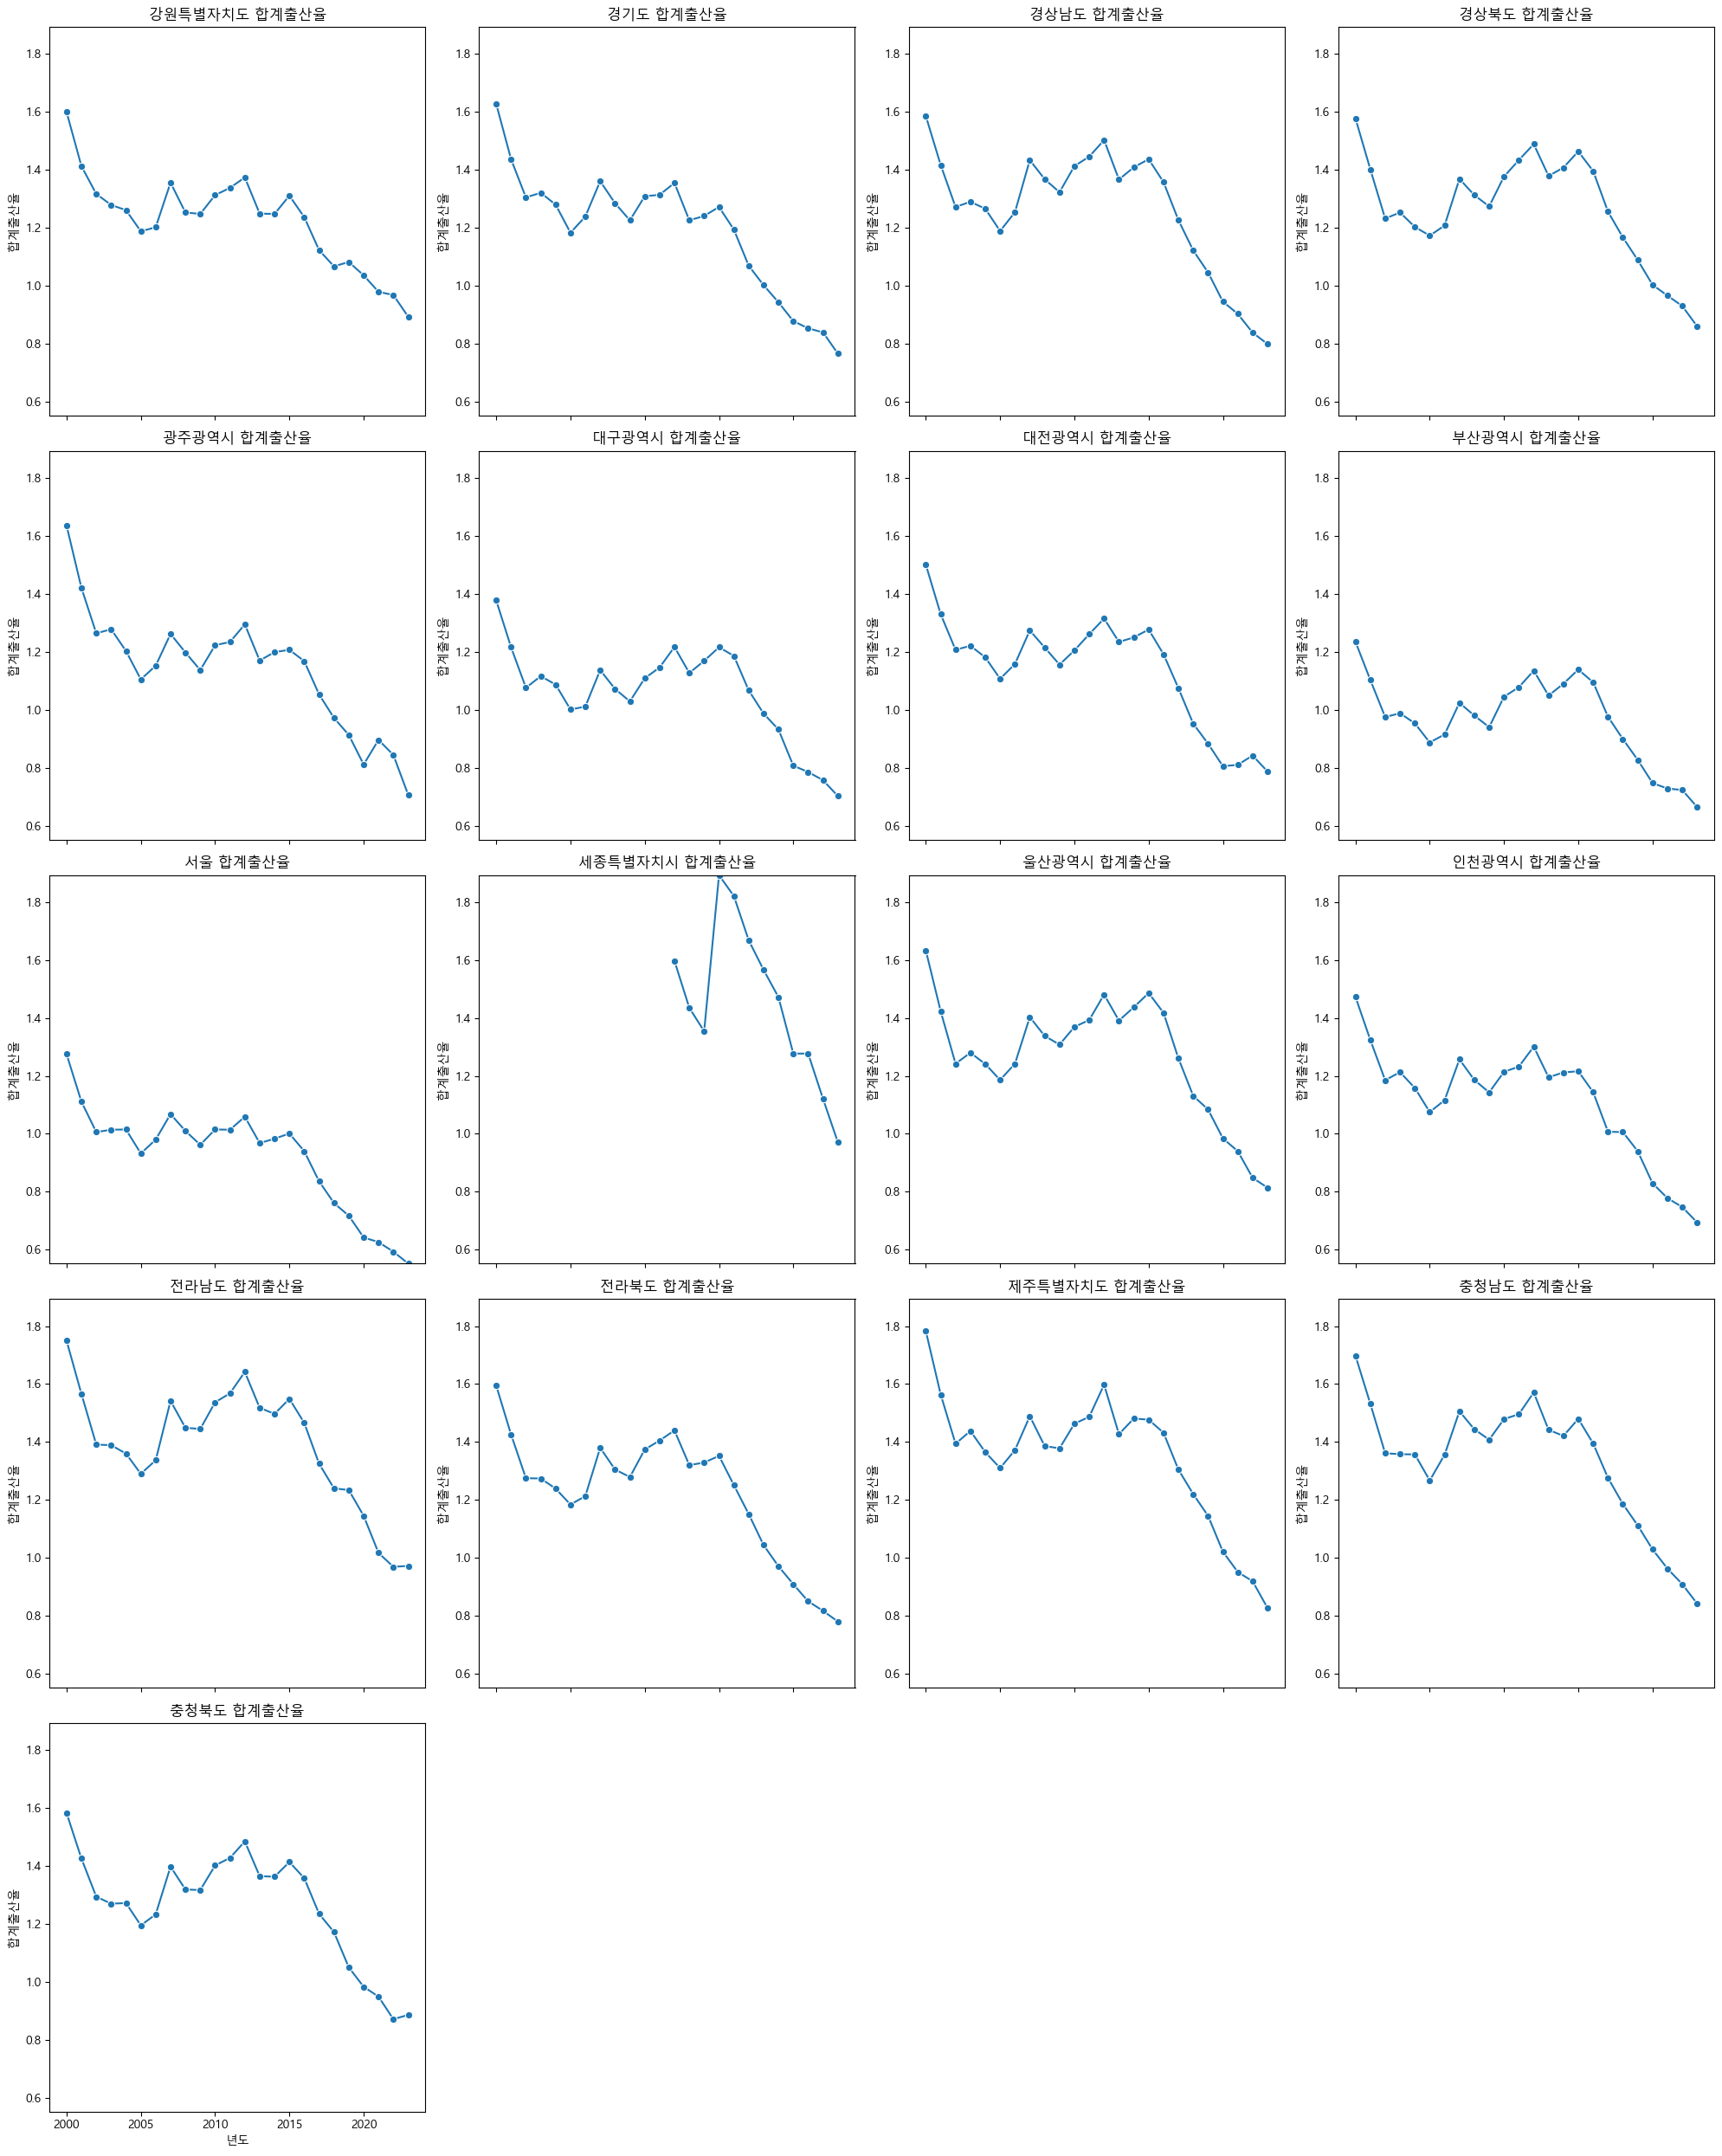

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 폰트 깨짐 해결
import matplotlib.font_manager as fm
font_path = 'C:/Windows/Fonts/malgun.ttf'
font_prop = fm.FontProperties(fname=font_path, size=12)
plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['axes.unicode_minus'] = False

# '합계출산율' 열을 숫자형으로 변환
df['합계출산율'] = pd.to_numeric(df['합계출산율'], errors='coerce')

# 지역과 시점별 합계출산율 집계
region_year_data = df.groupby(['시점', '지역별'])['합계출산율'].mean().reset_index()

# 고유 지역 수와 서브플롯 설정
unique_regions = region_year_data['지역별'].unique()
n_regions = len(unique_regions)

# 행과 열 수 계산
n_cols = 4  # 열 수를 2로 설정
n_rows = int(np.ceil(n_regions / n_cols))  # 필요한 행 수 계산

# y축 범위 설정 (최소값과 최대값)
y_min = region_year_data['합계출산율'].min()
y_max = region_year_data['합계출산율'].max()

# 서브플롯 설정
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows), sharex=True)
axes = axes.flatten()  # 2D 배열을 1D로 변환

# 각 지역별로 그래프 그리기
for ax, region in zip(axes, unique_regions):
    region_data = region_year_data[region_year_data['지역별'] == region]
    sns.lineplot(data=region_data, x='시점', y='합계출산율', ax=ax, marker='o')
    ax.set_title(f'{region} 합계출산율')
    ax.set_ylabel('합계출산율')
    ax.set_ylim(y_min, y_max)  # y축 범위 설정

# 나머지 서브플롯에 빈 공간 채우기
for i in range(len(unique_regions), len(axes)):
    fig.delaxes(axes[i])  # 사용하지 않는 서브플롯 제거

# x축 레이블 설정
plt.xlabel('년도')
plt.tight_layout()

# 그래프 표시
plt.show()

In [3]:
# 병합 지역 리스트
metropolitan_cities1 = ['부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시', '울산광역시']
metropolitan_cities2 = ['강원특별자치도', '경기도', '경상남도', '경상북도', '세종특별자치시', '전라남도', '전라북도', '제주특별자치도', '충청남도', '충청북도']

# 지역별로 변경
df['지역별'] = df['지역별'].replace(metropolitan_cities1, '광역시')
df['지역별'] = df['지역별'].replace(metropolitan_cities2, '대도시외')

# 합계출산율을 숫자형으로 변환, 오류 발생 시 NaN 처리
df['합계출산율'] = pd.to_numeric(df['합계출산율'], errors='coerce')

# 합계출산율의 평균을 계산하여 그룹화
df = df.groupby(['시점', '지역별'], as_index=False)['합계출산율'].mean()

df.head(), df['지역별'].unique()

(     시점   지역별     합계출산율
 0  2000   광역시  1.476000
 1  2000  대도시외  1.644556
 2  2000    서울  1.275000
 3  2001   광역시  1.302833
 4  2001  대도시외  1.464778,
 array(['광역시', '대도시외', '서울'], dtype=object))

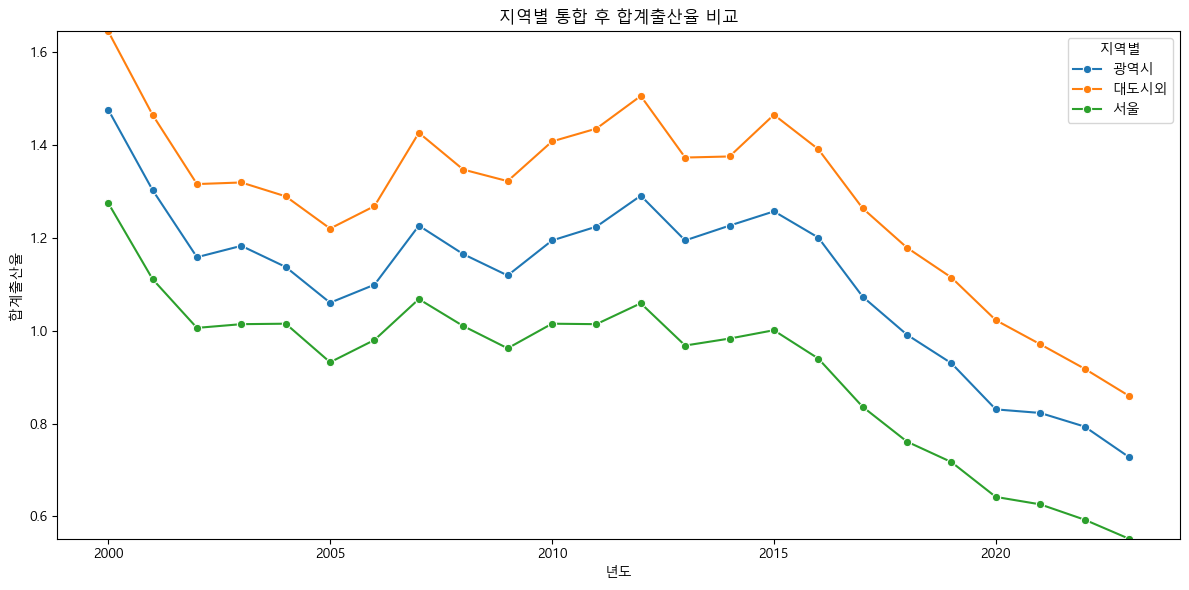

In [4]:
# '합계출산율' 열을 숫자형으로 변환
df['합계출산율'] = pd.to_numeric(df['합계출산율'], errors='coerce')

# 지역과 시점별 합계출산율 집계
region_year_data = df.groupby(['시점', '지역별'])['합계출산율'].mean().reset_index()

# y축 범위 설정 (최소값과 최대값)
y_min = region_year_data['합계출산율'].min()
y_max = region_year_data['합계출산율'].max()

# 그래프 설정
plt.figure(figsize=(12, 6))

# 지역별로 선 그래프 그리기
sns.lineplot(data=region_year_data, x='시점', y='합계출산율', hue='지역별', marker='o')

# y축 범위 설정
plt.ylim(y_min, y_max)

# 축 설정
plt.xlabel('년도')
plt.ylabel('합계출산율')
plt.title('지역별 통합 후 합계출산율 비교')
plt.legend(title='지역별')

# 그래프 표시
plt.tight_layout()
plt.show()

In [5]:
# '시점'을 datetime 형식으로 변환
df['시점'] = pd.to_datetime(df['시점'].astype(str) + '-01-01')

# 인덱스로 설정
yearly_data = df.set_index('시점')

# 지역별로 그룹화 후 리샘플링
monthly_dfs = []

for region, group in yearly_data.groupby('지역별'):
    monthly_df = group.resample('ME').agg({'합계출산율': 'mean'})
    
    # 보간
    monthly_df = monthly_df.interpolate(method='linear')
    
    # NaN 값 처리
    monthly_df.fillna(0, inplace=True)
    
    # 시점 다시 설정
    monthly_df.reset_index(inplace=True)
    
    # '시점'이 datetime인지 확인 후, 형식 변경
    if pd.api.types.is_datetime64_any_dtype(monthly_df['시점']):
        monthly_df['시점'] = monthly_df['시점'].dt.strftime('%Y.%m')
    
    # 지역별 컬럼 추가
    monthly_df['지역별'] = region
    
    monthly_dfs.append(monthly_df)

# 모든 지역별 데이터를 하나의 DataFrame으로 결합
final_monthly_df = pd.concat(monthly_dfs, ignore_index=True)

final_monthly_df.head(12), final_monthly_df.shape, final_monthly_df['지역별'].unique()

# # 데이터 저장
# final_monthly_df.to_csv('monthly_sum.csv', index=False)
